In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
df=pd.read_csv(r"D:\University\Extra Courses\DL workshop\Python Practicles\Cardio Regression Problem\WebApp\data\cardio_dataset.csv").values

In [46]:
data = df[:,0:7]
target=df[:,7]

In [47]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled=scaler_data.transform(data)
target_scaled=scaler_target.transform(target)

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_scaled,target_scaled,test_size=0.2)

In [49]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout

model1=models.Sequential()
model1.add(layers.Dense(128,input_dim=7,activation='tanh',kernel_initializer='normal'))
model1.add(Dropout(0.5))
model1.add(layers.Dense(64,activation='tanh'))
model1.add(Dropout(0.5))
model1.add(layers.Dense(10,activation='tanh'))
model1.add(layers.Dense(1,activation='linear'))

model1.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1024      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-traina

In [50]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback): #after 1 epoch print r2 score

    def on_epoch_end(self,epoch,logs=None):
        predicted_result=model1.predict(X_test)
        r2=r2_score(y_test,predicted_result)
        print('epoch',epoch,'- r2 score:',r2)

In [51]:
from keras.callbacks import ModelCheckpoint #save model

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto') #here we try to save best model
#saved in model folder,if val loss less than previous epoch then save model

In [52]:
history=model1.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200


42/42 [==============================] - 0s 1ms/step
epoch 0 - r2 score: 0.7281626483612598
167/167 [==============================] - 4s 20ms/step - loss: 0.0158 - mse: 0.0158 - mae: 0.0892 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0570
Epoch 2/200
42/42 [==============================] - 0s 1ms/step
epoch 1 - r2 score: 0.7434533818773237
167/167 [==============================] - 4s 24ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0650 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0560
Epoch 3/200
42/42 [==============================] - 0s 2ms/step
epoch 2 - r2 score: 0.7455386394109538
167/167 [==============================] - 4s 21ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0620 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0537
Epoch 4/200
42/42 [==============================] - 0s 2ms/step loss: 0.0079 - mse: 0.0079 - mae: 0.
epoch 3 - r2 score: 0.7378147779235831
167/167 [==============================] - 1s 4ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0622

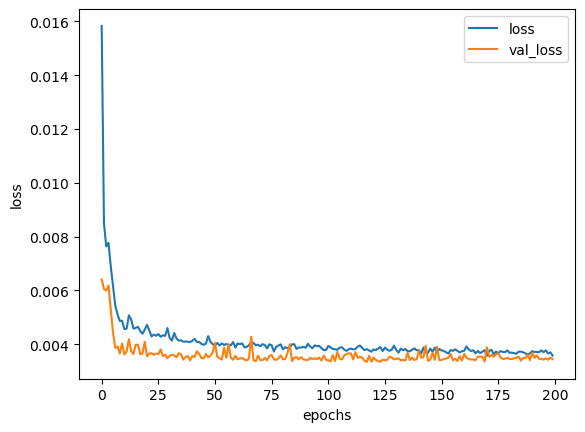

In [53]:
plt.plot(model1.history.history['loss'],label='loss')
plt.plot(model1.history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [54]:
import joblib

joblib.dump(scaler_data,'sacler_data.sav') #scale down,up models save
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']